# <center><h1><span style="font-family:Georgia; color:black">Online Retail II - RFM Analysis</span></h1></center>


**1. Import Libraries**

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import warnings
warnings.simplefilter(action='ignore') # to ignore error warnings.
import datetime as dt

**2. Import Data**

In [159]:
df = pd.read_excel("online_retail_II.xlsx")

In [160]:
df.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
107625,499752,82486,WOOD S/3 CABINET ANT WHITE FINISH,2,2010-03-02 11:53:00,7.95,17477.0,United Kingdom
464598,533290,22348,TEA BAG PLATE RED RETROSPOT,12,2010-11-16 15:46:00,0.85,14911.0,EIRE
156114,504203,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,144,2010-04-12 11:19:00,0.55,13408.0,United Kingdom
271817,515768,21447,12 IVORY ROSE PEG PLACE SETTINGS,2,2010-07-14 14:30:00,1.25,18096.0,United Kingdom
134982,502258,84997B,RED 3 PIECE MINI DOTS CUTLERY SET,2,2010-03-23 15:10:00,3.75,14166.0,United Kingdom


**3. Data Framing and Data Understanding**

In [161]:
# I am creating two separate data frames, one for the canceled ones and the other for the ones 
# that are not canceled, unlike the data frame I originally generated

In [162]:
df_cancelled = df[df["Invoice"].str.startswith("C", na = False)]
df_cancelled

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [163]:
df_sales = df[~(df["Invoice"].str.startswith("C", na = False))]
df_sales

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [165]:
# The dataset contains 525,461 entries, with null values in the customerID and description fields.

In [166]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


**4. Data Preprocessing**

In [167]:
df_sales.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107560
Country             0
dtype: int64

In [168]:
# Description contains 2,928, and Customer ID contains 107,560 null values.

In [169]:
# Since RFM analysis is a customer-centric analysis that examines customer behaviors, 
# it would be more appropriate to remove null values and work with clean data for accurate results.

In [170]:
df_sales.dropna(subset = ["Customer ID"], how = "all", inplace = True)

In [171]:
df_sales.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [172]:
df_cancelled.isnull().sum()

Invoice          0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
Price            0
Customer ID    367
Country          0
dtype: int64

In [173]:
df_cancelled.dropna(subset = ["Customer ID"], how = "all", inplace = True)

In [174]:
df_cancelled.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [175]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407695 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      407695 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.0+ MB


In [176]:
df_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9839 entries, 178 to 525282
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      9839 non-null   object        
 1   StockCode    9839 non-null   object        
 2   Description  9839 non-null   object        
 3   Quantity     9839 non-null   int64         
 4   InvoiceDate  9839 non-null   datetime64[ns]
 5   Price        9839 non-null   float64       
 6   Customer ID  9839 non-null   float64       
 7   Country      9839 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 691.8+ KB


In [177]:
# Keeping the CUSTOMER ID numbers in float type was not very accurate when examining the dataset, 
# so we need to convert them to strings, which means getting rid of the decimals.

In [178]:
df_sales["Customer ID"] = df_sales["Customer ID"].astype(int)
df_cancelled["Customer ID"] = df_cancelled["Customer ID"].astype(int)

In [179]:
df_sales["Customer ID"] = df_sales["Customer ID"].astype(str)
df_cancelled["Customer ID"] = df_cancelled["Customer ID"].astype(str)

In [180]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407695 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  object        
 7   Country      407695 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 28.0+ MB


In [181]:
df_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9839 entries, 178 to 525282
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      9839 non-null   object        
 1   StockCode    9839 non-null   object        
 2   Description  9839 non-null   object        
 3   Quantity     9839 non-null   int64         
 4   InvoiceDate  9839 non-null   datetime64[ns]
 5   Price        9839 non-null   float64       
 6   Customer ID  9839 non-null   object        
 7   Country      9839 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 691.8+ KB


**5. Data Understanding II**

In [182]:
df.shape

(525461, 8)

In [183]:
df_sales.shape

(407695, 8)

In [184]:
df_cancelled.shape

(9839, 8)

In [185]:
df_sales.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [186]:
df_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,407695.0,13.586686,96.842229,1.0,2.00,5.00,12.00,19152.0
Price,407695.0,3.294188,34.756655,0.0,1.25,1.95,3.75,10953.5


In [187]:
# number of unique items sold in the sales data

df_sales["StockCode"].nunique()

4017

In [188]:
# number of unique items sold in the cancelled data

df_cancelled["StockCode"].nunique()

2080

In [189]:
# top 10 best-selling products

df_sales.groupby("StockCode")["Quantity"].sum().sort_values(ascending = False).head(10).reset_index()

# or

# df_sales.groupby("StockCode").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head(10) 

,StockCode,Quantity
0,21212,57570
1,85123A,56915
2,84077,54754
3,85099B,48802
4,17003,48166
5,84879,44551
6,84991,35806
7,21977,31006
8,22197,28788
9,37410,25685


In [190]:
# top 10 most returned products

df_cancelled.groupby("StockCode")["Quantity"].sum().sort_values(ascending = True).head(10).reset_index()

,StockCode,Quantity
0,84347,-9363
1,21088,-7128
2,21096,-7008
3,16047,-5184
4,85110,-5040
5,37340,-4993
6,16046,-4632
7,85160A,-4320
8,85184D,-3940
9,16162L,-3744


In [191]:
# total number of invoices issued

df_sales["Invoice"].nunique()

19215

In [192]:
df_sales["TotalSpend"] = df_sales["Quantity"]*df_sales["Price"]
df_sales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSpend
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [193]:
df_sales.groupby("Invoice").agg({"TotalSpend" : "sum"}).sort_values("TotalSpend", ascending = False).head(10)

,TotalSpend
Invoice,
493819,44051.60
524181,33167.80
526934,26007.08
515944,22863.36
517731,21984.00
495591,18570.88
494243,18532.30
531866,18122.17
515187,17995.88


In [194]:
# sales by country

df_sales.groupby("Country")["Quantity"].sum().sort_values(ascending = False).reset_index()

,Country,Quantity
0,United Kingdom,4449351
1,Denmark,229690
2,Netherlands,183680
3,EIRE,181428
4,France,162202
5,Germany,108740
6,Sweden,52429
7,Spain,22856
8,Switzerland,22255
9,Australia,20189


In [195]:
df_country_and_stock_code_based_sales = df_sales.groupby(["Country", "StockCode"])["Quantity"].sum().sort_values(
                                        ascending = False).reset_index()
df_country_and_stock_code_based_sales

,Country,StockCode,Quantity
0,United Kingdom,85123A,51679
1,United Kingdom,84077,51538
2,United Kingdom,17003,48014
3,United Kingdom,21212,45025
4,United Kingdom,85099B,43829
...,...,...,...
17667,Japan,22276,1
17668,Japan,22199,1
17669,Japan,21790,1
17670,Japan,21647,1


In [196]:
# each country's highest sales volume and the stock codes of those sales

df_country_and_stock_code_based_sales.groupby("Country").head(1)

,Country,StockCode,Quantity
0,United Kingdom,85123A,51679
9,Denmark,37410,25164
116,France,21088,7152
161,Sweden,16033,5760
173,Netherlands,35961,5425
269,EIRE,21212,4056
705,Spain,22670,1740
747,Germany,20719,1590
793,Japan,22328,1497
1643,Channel Islands,51008,600


In [197]:
df_sales.groupby("Country").agg({"TotalSpend" : "sum"}).sort_values("TotalSpend", ascending = False)

,TotalSpend
Country,
United Kingdom,7414755.963
EIRE,356085.210
Netherlands,268786.000
Germany,202395.321
France,146215.420
Sweden,53171.390
Denmark,50906.850
Spain,47601.420
Switzerland,43921.390


In [198]:
df_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,407695.0,13.586686,96.842229,1.0,2.00,5.00,12.00,19152.0
Price,407695.0,3.294188,34.756655,0.0,1.25,1.95,3.75,10953.5
TotalSpend,407695.0,21.663261,77.147356,0.0,4.95,11.90,19.50,15818.4


**6. Customer Segmentation with RFM Scores**

**6.1. Recency !!**

In [199]:
# Since the data set is old, if we subtract the last shopping date of the customer from today, 
# we will get an absurd output. Therefore, we will use the last shopping date in the data as today.

In [200]:
df_sales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSpend
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [201]:
last_invoice_date = df_sales["InvoiceDate"].max()
last_invoice_date

Timestamp('2010-12-09 20:01:00')

In [202]:
today = dt.datetime(2010, 12, 9, 20, 1, 0)
today

datetime.datetime(2010, 12, 9, 20, 1)

In [203]:
# The process conducted here is to find the most recent purchase dates of customers. 
# Subsequently, it involves subtracting these dates from the date defined as 'today.' Afterward, 
# the name of the column is changed, and using a lambda function, we convert the obtained result into days.

df_rec = (today - 
          df_sales.groupby("Customer ID").agg({"InvoiceDate" : "max"})).rename(
          columns = {"InvoiceDate" : "Recency"})["Recency"].apply(lambda x : x.days)

In [204]:
df_recency = pd.DataFrame(df_rec)

In [205]:
df_recency.sort_values( by = "Recency", ascending = False).head(5)

,Recency
Customer ID,
16763,373
12636,373
17056,373
12362,373
13526,373


**6.2. Frequency !!**

In [206]:
df_freq = df_sales.groupby(["Customer ID", "Invoice"]).agg({"Invoice" : "count"})
df_freq

Invoice
Customer ID Invoice         
12346       491725         1
            491742         1
            491744         1
            492718         1
            492722         1
...                      ...
18286       519785        50
18287       508581        54
            523289        19
            523290         2
            534346        10

[19215 rows x 1 columns]

In [207]:
# In order to determine the shopping frequencies, we initially performed a counting process based on the 
# customer IDs and invoices. Subsequently, using the output obtained from this process, we counted 
# the invoices to obtain the shopping frequency of our customers.

df_frequency = df_freq.groupby("Customer ID").agg({"Invoice" : "count"}).rename(columns = {"Invoice" : "Frequency"})
df_frequency

,Frequency
Customer ID,
12346,11
12347,2
12348,1
12349,3
12351,1
...,...
18283,6
18284,1
18285,1


**6.3. Monetary !!**

In [208]:
# For the field that contains the total expenditures of our customers, namely the 'monetary' field, 
# we summed up the customer-specific total expenditure field and completed this stage by naming it 'monetary'.

df_monetary = df_sales.groupby("Customer ID").agg({"TotalSpend" : "sum"}).rename(columns = {"TotalSpend" : "Monetary"})
df_monetary

,Monetary
Customer ID,
12346,372.86
12347,1323.32
12348,222.16
12349,2671.14
12351,300.93
...,...
18283,641.77
18284,461.68
18285,427.00


**6.4. Merging of RFM Fields !!**

In [209]:
# We calculated the number of purchases made by our customers, the number of days since the last order, 
# and the amount of money they left as separate data frames. In order to analyze the data, we need to 
# merge these three data frames. We will accomplish this task using the concatenation operation of the Pandas library.

dfs = [df_recency, df_frequency, df_monetary]

df_rfm = pd.concat(dfs, axis=1)

print(df_rfm)

             Recency  Frequency  Monetary
Customer ID                              
12346            164         11    372.86
12347              2          2   1323.32
12348             73          1    222.16
12349             42          3   2671.14
12351             10          1    300.93
...              ...        ...       ...
18283             17          6    641.77
18284             66          1    461.68
18285            295          1    427.00
18286            111          2   1296.43
18287             17          4   2345.71

[4314 rows x 3 columns]


In [210]:
# After combining the RFM query results we obtained, we convert them into a pandas dataframe.

df_rfm = pd.DataFrame(df_rfm)
df_rfm

,Recency,Frequency,Monetary
Customer ID,,,
12346,164,11,372.86
12347,2,2,1323.32
12348,73,1,222.16
12349,42,3,2671.14
12351,10,1,300.93
...,...,...,...
18283,17,6,641.77
18284,66,1,461.68
18285,295,1,427.00


**6.5. Conversion of RFM Data Into Scores !!**

In [211]:
score_1to5 = ["1","2","3","4","5"]
score_5to1 = ["5","4","3","2","1"]

# In general, in RFM analyses, the scoring system is evaluated on a daily basis and ranges between 1 and 5 points. 
# In this analysis, when scoring for recency, a low score is associated with a higher time interval, 
# implying that as the time since last interaction increases, the score should decrease. 
# Therefore, we employed a '5to1' scoring system. For frequency and monetary aspects, 
# given that a higher shopping frequency and greater amount of money left by the customer should result in a 
# higher score, we utilized a '1to5' scoring approach.

In [212]:
# The reason for using the 'cut_bins' parameter is to have the frequency value fall within a specific 
# range, allowing us to score between those values. 

cut_bins = [0,1,2,4,10,210]

In [213]:
df_rfm["RecencyScore"] = pd.qcut(df_rfm['Recency'], 5, labels = score_5to1)
df_rfm["RecencyScore"].value_counts()

5    906
1    857
4    853
3    850
2    848
Name: RecencyScore, dtype: int64

In [214]:
df_rfm["FrequencyScore"] = pd.cut(df_rfm["Frequency"], bins = cut_bins, labels = score_1to5)
df_rfm["FrequencyScore"].value_counts()

1    1421
3     903
4     845
2     810
5     335
Name: FrequencyScore, dtype: int64

In [215]:
df_rfm["MonetaryScore"] = pd.qcut(df_rfm['Monetary'], 5, labels = score_1to5)
df_rfm["MonetaryScore"].value_counts()

1    863
2    863
4    863
5    863
3    862
Name: MonetaryScore, dtype: int64

In [216]:
# If we had wanted to divide our data into groups of similar magnitudes for each value and maintain this distribution, 
# using the 'qcut' function would have been logical. We applied this to recency and monetary. However, 
# since segmenting values like Frequency into intervals for scoring aligned well with our analysis, we chose to use 'cut'

In [217]:
df_rfm['RFM_SCORE'] = df_rfm["RecencyScore"].astype(str) + df_rfm["FrequencyScore"].astype(str) + df_rfm[
                                                                                                "MonetaryScore"].astype(str)
df_rfm


# We added an additional column to our dataframe called 'RFM_SCORE', where we combined the recency, 
# frequency, and monetary fields to create a total score.

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346,164,11,372.86,2,5,2,252
12347,2,2,1323.32,5,2,4,524
12348,73,1,222.16,2,1,1,211
12349,42,3,2671.14,3,3,5,335
12351,10,1,300.93,5,1,2,512
...,...,...,...,...,...,...,...
18283,17,6,641.77,4,4,3,443
18284,66,1,461.68,3,1,2,312
18285,295,1,427.00,1,1,2,112


In [218]:
df_rfm[df_rfm["RFM_SCORE"]=='555'].head()

# After creating the RFM scores, we evaluated the customers who obtained the highest and 
# lowest RFM scores by running a query and examining the resulting list of customers.

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12431,8,13,4370.52,5,5,5,555
12471,9,49,20139.74,5,5,5,555
12472,4,13,11308.48,5,5,5,555
12474,13,13,5048.66,5,5,5,555
12483,13,11,2635.60,5,5,5,555


In [219]:
df_rfm[df_rfm["RFM_SCORE"]=='111'].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12362,373,1,130.00,1,1,1,111
12392,226,1,234.75,1,1,1,111
12404,317,1,63.24,1,1,1,111
12416,291,1,202.56,1,1,1,111
12466,317,1,56.73,1,1,1,111


In [220]:
df_rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4314.0,90.269124,96.943482,0.0,17.00,52.00,135.0000,373.00
Frequency,4314.0,4.454103,8.168658,1.0,1.00,2.00,5.0000,205.00
Monetary,4314.0,2047.288659,8912.523243,0.0,307.95,705.55,1722.8025,349164.35


**6.6. Customer Segmentation !!**

In [221]:
def segment_customers(row):
    recency_score = int(row["RFM_SCORE"][0])
    frequency_score = int(row["RFM_SCORE"][1])
    
    if recency_score <= 2 and frequency_score <= 2:
        return 'Hibernating'
    elif recency_score <= 2 and 3 <= frequency_score <= 4:
        return 'At Risk'
    elif recency_score <= 2 and frequency_score == 5:
        return "Can't Loose"
    elif recency_score == 3 and frequency_score <= 2:
        return 'About to Sleep'
    elif recency_score == 3 and frequency_score == 3:
        return 'Need Attention'
    elif 3 <= recency_score <= 4 and 4 <= frequency_score <= 5:
        return 'Loyal Customers'
    elif recency_score == 4 and frequency_score == 1:
        return 'Promising'
    elif recency_score == 5 and frequency_score == 1:
        return 'New Customers'
    elif 4 <= recency_score <= 5 and 2 <= frequency_score <= 3:
        return 'Potential Loyalists'
    elif recency_score == 5 and 4 <= frequency_score <= 5:
        return 'Champions'

df_rfm['Segment'] = df_rfm.apply(segment_customers, axis=1)

In [222]:
# RFM analysis is an analysis that enables us to generate crucial insights about customers' shopping behavior. 
# As a result of this analysis, individually evaluating customers becomes nearly impossible. 
# Therefore, after segmenting customers based on their scores into specific RFM groups, 
# we need to interpret their behavior through these groups.

In [223]:
df_rfm

# After creating the dataframe, we have completed and prepared the main dataset for RFM analysis, 
# making it ready for interpretation. Following this stage, the next steps involve interpreting 
# the output and generated visuals, and then taking actions for the customers.

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346,164,11,372.86,2,5,2,252,Can't Loose
12347,2,2,1323.32,5,2,4,524,Potential Loyalists
12348,73,1,222.16,2,1,1,211,Hibernating
12349,42,3,2671.14,3,3,5,335,Need Attention
12351,10,1,300.93,5,1,2,512,New Customers
...,...,...,...,...,...,...,...,...
18283,17,6,641.77,4,4,3,443,Loyal Customers
18284,66,1,461.68,3,1,2,312,About to Sleep
18285,295,1,427.00,1,1,2,112,Hibernating


In [224]:
df_rfm[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count"])

# Finally, to derive a general understanding from the data, we perform a grouping process based on segments.

Recency        Frequency           Monetary      
                           mean count       mean count         mean count
Segment                                                                  
About to Sleep        52.726477   457   1.400438   457   523.735098   457
At Risk              137.774775   444   4.281532   444  1827.981466   444
Can't Loose          136.272727    11  19.363636    11  7028.365455    11
Champions              5.846014   552  14.336957   552  8010.322451   552
Hibernating          204.674400  1250   1.288800  1250   450.531211  1250
Loyal Customers       33.546973   479   8.544885   479  3483.544061   479
Need Attention        52.577778   225   3.431111   225  1412.024933   225
New Customers          8.101124    89   1.000000    89   337.436854    89
Potential Loyalists   17.054859   638   2.841693   638  1009.464625   638
Promising             24.159763   169   1.000000   169   345.946805   169

In [225]:
df_rfm.to_csv("df_rfm.csv")

# I converted the created DataFrame named 'df_rfm' into an output by saving it as a CSV file and prepared it for visualization.

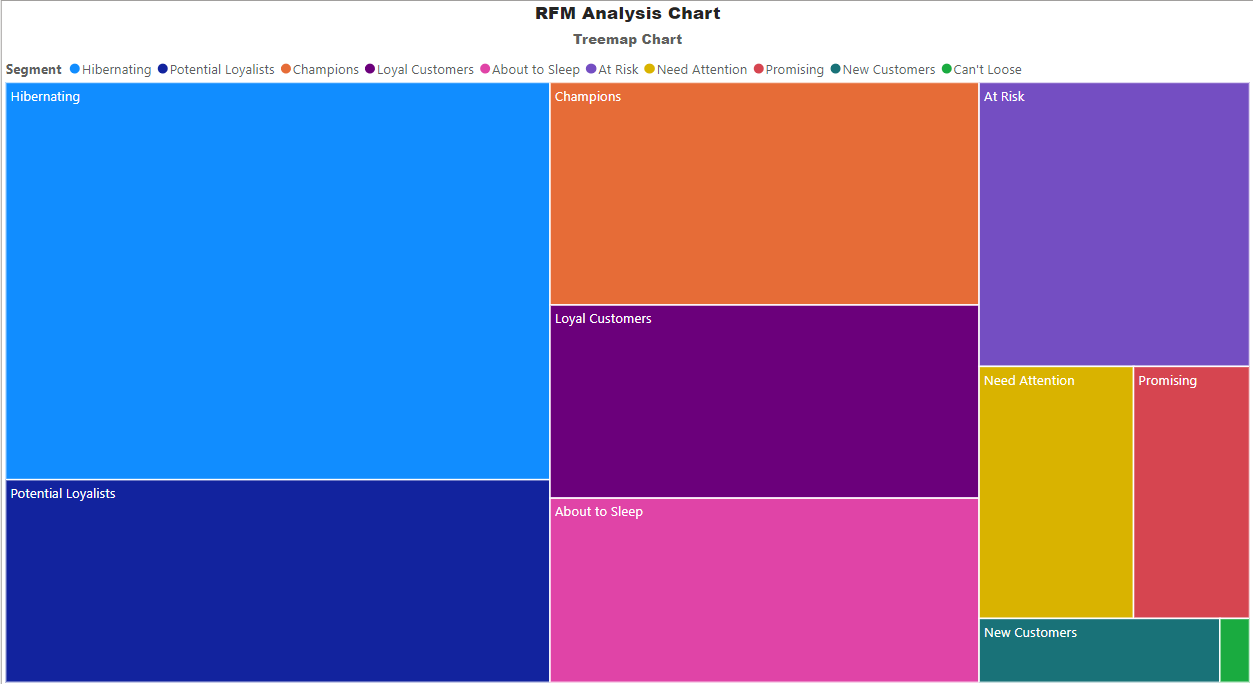